In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Understanding and Cleaning

## Dataset: Titanic 

* This dataset contains the records of the real titatic passenger where each row is equal to one persons' attribute.

#### Importing the dataset

In [2]:
df_traindata = pd.read_csv("D:\Jenny\AIML-sem6\\Titanic_Train.csv")
df_testdata = pd.read_csv("D:\Jenny\AIML-sem6\\Titanic_Test.csv")

In [3]:
df_traindata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
887,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
888,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
889,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* The dataset consists of 12 columns including 11 features and 1 target column which is in the form of binary classification
* The data contains both numerical and categorical features
* Target column is survival where 0 stands for dead and 1 for survived
* Rest of the other columns are features

In [4]:
df_testdata

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
type(df_traindata)

pandas.core.frame.DataFrame

In [6]:
type(df_testdata)

pandas.core.frame.DataFrame

In [7]:
df_traindata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_testdata.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_traindata.shape

(891, 12)

* Train dataset contains 891 rows and 12 columns respectively

In [10]:
df_testdata.shape

(418, 11)

* Test dataset contains 418 rows and 11 columns respectively

### Printing out the first five row

In [11]:
df_traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [12]:
df_testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Printing out the last five row

In [13]:
df_traindata.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
887,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
888,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
889,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
890,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [14]:
df_testdata.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Printing the middle rows

In [15]:
df_traindata.iloc[10:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
11,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
12,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
13,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
14,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
15,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S
16,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
17,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
18,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
19,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [16]:
df_testdata.iloc[10:20]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
13,905,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
16,908,2,"Keane, Mr. Daniel",male,35.0,0,0,233734,12.3500,NaN,Q
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S
19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C


### Finding out the datatypes of each columns

In [17]:
df_traindata.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
df_testdata.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
df_traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that in the training data Age, cabin and embraked has some missing values

In [20]:
df_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We have similar situtation in the test data too

Lets not fill in the missing values as we are about the drop the columns that are not necessary

Creating the dummies of the columns Embarked as it can also be and important column to determinte the survival of passenger

In [21]:
ports = pd.get_dummies(df_traindata.Embarked, prefix = 'Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,1,0


In [22]:
ports1 = pd.get_dummies(df_testdata.Embarked, prefix = 'Embarked')
ports1.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [23]:
df_traindata = df_traindata.join(ports)

In [24]:
df_testdata = df_testdata.join(ports1)

In [25]:
#dropping the columns that are not so useful
column_drop = ['Name','Ticket','Cabin','Fare','Embarked']
train_data_drop =df_traindata.drop(column_drop, axis=1)
test_data_drop =df_testdata.drop(column_drop, axis=1)

As in the titanic data we are predicitng reason of passenger death and survival where the Name of the passenger does not matter, Ticket also does not matter, passenger cabin does not matter, Fare they pay also does not matter and Embarked is dropped because we have made dummies of that columns and divided them into three different individual columns

In [26]:
train_data_drop.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,631,1,1,male,80.0,0,0,0,0,1
1,852,0,3,male,74.0,0,0,0,0,1
2,97,0,1,male,71.0,0,0,1,0,0
3,494,0,1,male,71.0,0,0,1,0,0
4,117,0,3,male,70.5,0,0,0,1,0


In [27]:
test_data_drop.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,0,1,0
1,893,3,female,47.0,1,0,0,0,1
2,894,2,male,62.0,0,0,0,1,0
3,895,3,male,27.0,0,0,0,0,1
4,896,3,female,22.0,1,1,0,0,1


In [28]:
#checking if there are any missing values in both train and test data
train_data_drop.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [29]:
test_data_drop.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

We can observe that there are 86 missing values in Age

In [30]:
#filling the missing values using already known values thatswhy interpolate is used
train_data_drop['Age'] = train_data_drop['Age'].interpolate()
test_data_drop['Age'] = test_data_drop['Age'].interpolate()

Here, interpolate is used to replace the missing value of age with two know values of age using median

In [31]:
#checking if there are any missing values in both train and test data
train_data_drop['Age'].isnull().sum()
test_data_drop['Age'].isnull().sum()

0

After filling up the missing values in Age column now there are no missing values

In [32]:
#loading the first 10 dataset after getting rid of the missing value with median
train_data_drop.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,631,1,1,male,80.0,0,0,0,0,1
1,852,0,3,male,74.0,0,0,0,0,1
2,97,0,1,male,71.0,0,0,1,0,0
3,494,0,1,male,71.0,0,0,1,0,0
4,117,0,3,male,70.5,0,0,0,1,0
5,673,0,2,male,70.0,0,0,0,0,1
6,746,0,1,male,70.0,1,1,0,0,1
7,34,0,2,male,66.0,0,0,0,0,1
8,55,0,1,male,65.0,0,1,1,0,0
9,281,0,3,male,65.0,0,0,0,1,0


In [33]:
test_data_drop.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,0,1,0
1,893,3,female,47.0,1,0,0,0,1
2,894,2,male,62.0,0,0,0,1,0
3,895,3,male,27.0,0,0,0,0,1
4,896,3,female,22.0,1,1,0,0,1
5,897,3,male,14.0,0,0,0,0,1
6,898,3,female,30.0,0,0,0,1,0
7,899,2,male,26.0,1,1,0,0,1
8,900,3,female,18.0,0,0,1,0,0
9,901,3,male,21.0,2,0,0,0,1


We can also observe that Age is in the form of float datatype which is suppose to be in int

In [34]:
#now converting the float dtype of age into int dtype
train_data_drop['Age'] = train_data_drop['Age'].astype(int)
test_data_drop['Age'] = test_data_drop['Age'].astype(int)

In [35]:
train_data_drop.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,631,1,1,male,80,0,0,0,0,1
1,852,0,3,male,74,0,0,0,0,1
2,97,0,1,male,71,0,0,1,0,0
3,494,0,1,male,71,0,0,1,0,0
4,117,0,3,male,70,0,0,0,1,0
5,673,0,2,male,70,0,0,0,0,1
6,746,0,1,male,70,1,1,0,0,1
7,34,0,2,male,66,0,0,0,0,1
8,55,0,1,male,65,0,1,1,0,0
9,281,0,3,male,65,0,0,0,1,0


In [36]:
test_data_drop.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34,0,0,0,1,0
1,893,3,female,47,1,0,0,0,1
2,894,2,male,62,0,0,0,1,0
3,895,3,male,27,0,0,0,0,1
4,896,3,female,22,1,1,0,0,1
5,897,3,male,14,0,0,0,0,1
6,898,3,female,30,0,0,0,1,0
7,899,2,male,26,1,1,0,0,1
8,900,3,female,18,0,0,1,0,0
9,901,3,male,21,2,0,0,0,1


We can now observe that the there are no furthur missing values in the dataset and Age now is in the form of integer

In [37]:
#rechecking the dtype of all columns again
train_data_drop.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Sex            object
Age             int32
SibSp           int64
Parch           int64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [38]:
test_data_drop.dtypes

PassengerId     int64
Pclass          int64
Sex            object
Age             int32
SibSp           int64
Parch           int64
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

As we know computers are not good as understanding string values so we are about to convert strings into integer and the only column with string value is column:Sex

In [39]:
#converting Sex into int dtype where male is = 0 and female is = 1
train_data_drop['Sex'].replace(['male','female'],[0,1],inplace=True)

Here, inplace=true is used to replace the value of Sex column in the original data if inplace=true is not done this line of codes will only execute within this lines of code

In [40]:
test_data_drop['Sex'].replace(['male','female'],[0,1],inplace=True)

In [41]:
train_data_drop.dtypes

PassengerId    int64
Survived       int64
Pclass         int64
Sex            int64
Age            int32
SibSp          int64
Parch          int64
Embarked_C     uint8
Embarked_Q     uint8
Embarked_S     uint8
dtype: object

In [42]:
test_data_drop.dtypes

PassengerId    int64
Pclass         int64
Sex            int64
Age            int32
SibSp          int64
Parch          int64
Embarked_C     uint8
Embarked_Q     uint8
Embarked_S     uint8
dtype: object

Now we can observe that we have successfully converted the object dtype into integer dtype

### Checking if there is any duplicate data

In [43]:
duplicate_data_train= train_data_drop[train_data_drop.duplicated()]

In [44]:
duplicate_data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S


In [45]:
duplicate_data_test= test_data_drop[test_data_drop.duplicated()]

In [46]:
duplicate_data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S


We can observe that there is no duplicate data now we can further analyzse features by using some plots

## Data Analysis and Visualization

#### For Gender

In titanic data 0 stands for dead passenger and 1 stands for survived

In [47]:
#finding out the total number of female and male that survived
train_data_drop[['Sex', 'Survived']].groupby(['Sex'], as_index=False).sum()

,Sex,Survived
0,0,109
1,1,233


In [48]:
#finding out the mean of female and male that survived
train_data_drop[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


<AxesSubplot:xlabel='Survived', ylabel='count'>

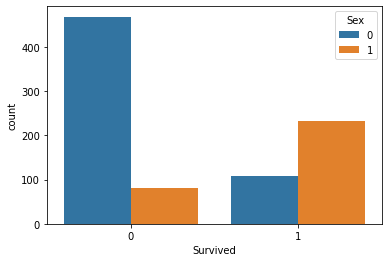

In [49]:
#plotting the number of surviors inrelation to sex
#here, hue is a parameter used to determine color encoding in a particular column in the dataframe
sns.countplot(train_data_drop["Survived"], hue=train_data_drop["Sex"])

Here, Hue is used to determine the plot of Survived in respect to Sex column

* We can observe that from the above graph that there is a strong corelation between sex columns and survived. Also, we can see the more females survived than males

#### For class of passanger

In [50]:
#finding out the total number of passanger travelling in Pclass(1st=Upper,2nd=Middle, 3rd=Lower)
train_data_drop[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


<AxesSubplot:xlabel='Survived', ylabel='count'>

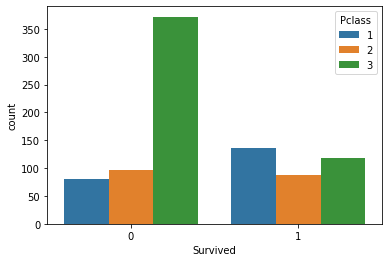

In [51]:
#plotting the number of surviors inrelation to Pclass
sns.countplot(train_data_drop["Survived"], hue=train_data_drop["Pclass"])

* We can observe from the above graph that the number of passangers travelling through 1st class survived the most, whereas those of 3rd class did not survive. As a result we can conclude that, class of passenger is important for surviving.

#### For Age

In [52]:
#finding out the total number of passanger of different age group and adding the same agegroup 
train_data_drop[['Age', 'Survived']].groupby(['Age'],as_index=False).sum()

,Age,Survived
0,0,59
1,1,5
2,2,3
3,3,5
4,4,7
...,...,...
66,66,0
67,70,0
68,71,0
69,74,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

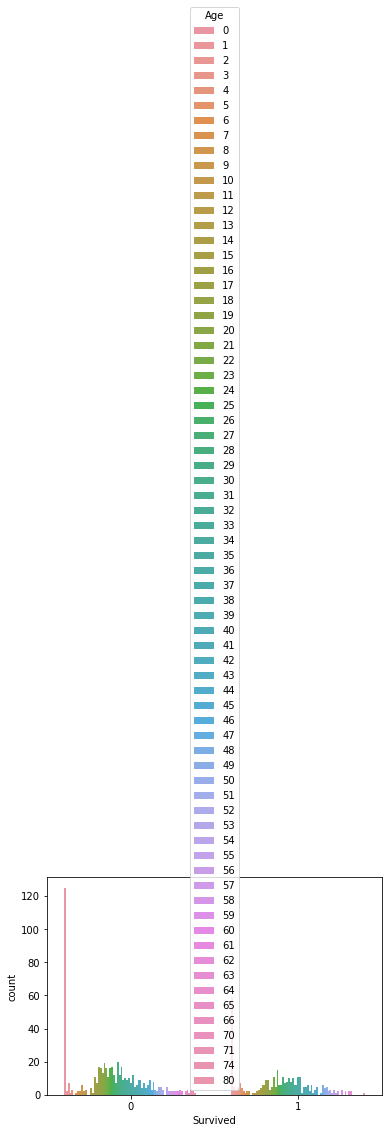

In [53]:
#plotting the number of surviors inrelation to Age
sns.countplot(train_data_drop["Survived"], hue=train_data_drop["Age"])

* From the above graph we cannot draw any conclusion about the number survivors in relation to age so we use a different plot to draw conclsuion

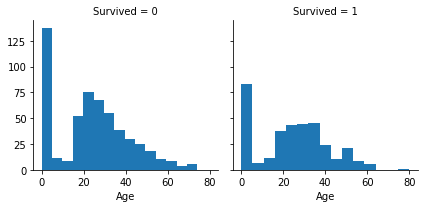

In [54]:
#plotting the number of surviors inrelation to Age
plot = sns.FacetGrid(train_data_drop, col='Survived')
plot.map(plt.hist, 'Age', bins=15)

* Form the above graph we can observe that children with (age<10) has high survival rates, (15-25) years yonge age has not survived. Whereas, middle age (25-35 years old) has survived.

#### For Number of family members

<AxesSubplot:xlabel='Survived', ylabel='count'>

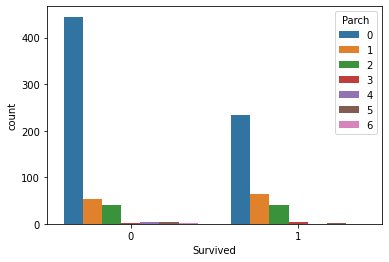

In [55]:
#plotting the number of surviors inrelation to Parch which is number of parents and children
sns.countplot(train_data_drop["Survived"], hue=train_data_drop["Parch"])

* We can observe that the passenger with 6 family memebers did not survived, whereas for 5 members some survived some did not, for 4 memebers did not survived, that for 1, 2, 3 memebers some survived some didnot, but that passenger with no family survival as well as death is higher. As for our hypothesis the passenger with no family members has higher chance of surviving 

<AxesSubplot:xlabel='Survived', ylabel='count'>

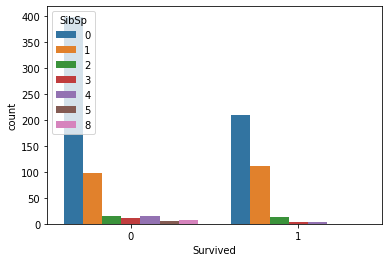

In [56]:
#plotting the number of surviors inrelation to SibSp which is number of siblings and spouse
sns.countplot(train_data_drop["Survived"], hue=train_data_drop["SibSp"])

* We can observe that again the survival and death passanger travelling alone are more in numbers, whereas passenger wih 8,5,4 siblings did not survive, and the passenger travelling with 1,2,3,4 siblings and spouse some survived some did not

In [57]:
#finding out the total number of passanger that survived in terms of SibSp and arranging the survivors in descending order
train_data_drop[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).sum().sort_values(by='Survived', ascending=False)

,SibSp,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


* From the above we can observe that single passangers has mostly survived whereas, it looks like not being single with family members is not an advantage for surviving

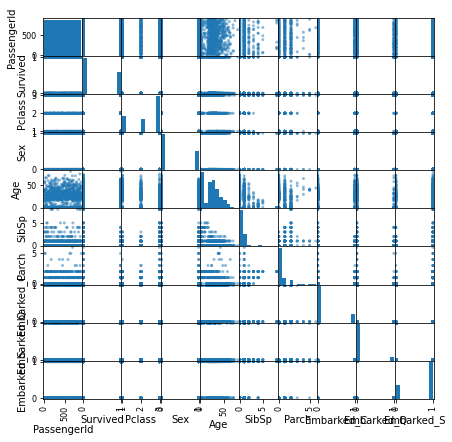

In [58]:
pd.plotting.scatter_matrix(train_data_drop, figsize=(7,7));

* we can visualize that each scatter formed in the matrix defines relatisonship between each pair of variables

#### Finding out the corelation between feature and target

Survived
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

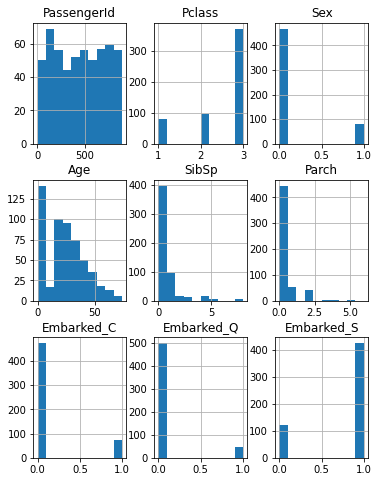

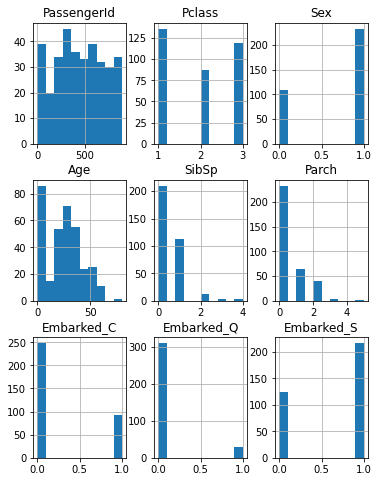

In [59]:
#plotting histogram for both not survived and survived
train_data_drop.groupby(train_data_drop["Survived"]).hist(figsize=(6,8))

* Above histogram represents both death passenger and survived passenger in relation to each columns 
i.e. above first each column till Embarked_S is the death passenger histogram representation
and other half is the survived passenger representation respectively

In [60]:
#calculating the corelation coefficient
columns = ["Survived","Pclass","Sex","Age","SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S"]

In [61]:
#corr() is used because it helps to calculate the corelation esaily
train_corr = train_data_drop[columns].corr()

In [62]:
#printing the dataset after performing corelation calculation
train_corr 

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,0.010508,-0.035322,0.081629,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.131900,-0.361566,0.083081,0.018443,-0.243292,0.221009,0.081720
Sex,0.543351,-0.131900,1.000000,-0.024710,0.114631,0.245489,0.082853,0.074115,-0.125722
Age,0.010508,-0.361566,-0.024710,1.000000,-0.184593,-0.049061,0.000879,-0.237632,0.140923
SibSp,-0.035322,0.083081,0.114631,-0.184593,1.000000,0.414838,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,0.245489,-0.049061,0.414838,1.000000,-0.011069,-0.081228,0.063036
Embarked_C,0.168240,-0.243292,0.082853,0.000879,-0.059528,-0.011069,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,0.074115,-0.237632,-0.026354,-0.081228,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.125722,0.140923,0.070941,0.063036,-0.778359,-0.496624,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap of Titanic Dataset'}>

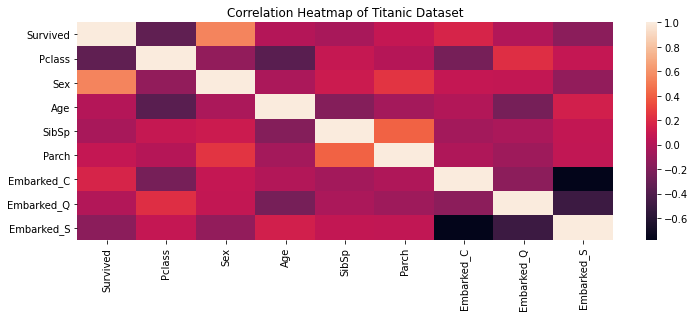

In [63]:
#plotting the heatmap by using heatmap()method
fig,ax = plt.subplots(figsize=(12,4))
plt.title('Correlation Heatmap of Titanic Dataset')
sns.heatmap(train_corr)

<AxesSubplot:>

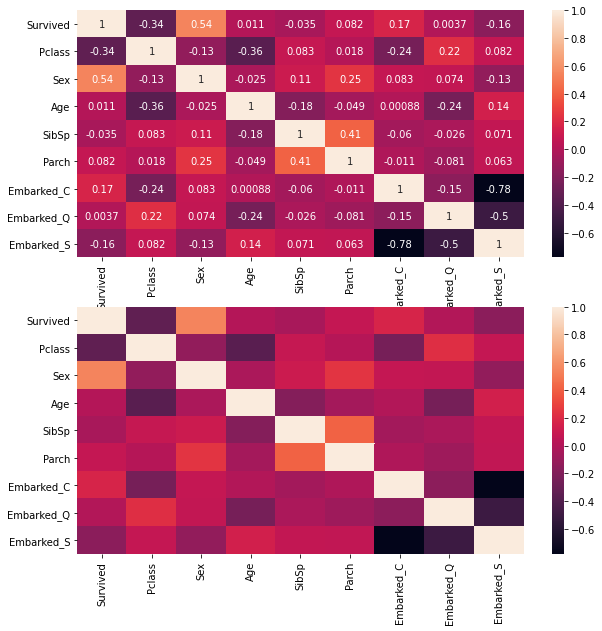

In [64]:
#adding annotations
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(10,10))
sns.heatmap(train_corr,annot=True,ax=ax1)
sns.heatmap(train_corr,annot=False,ax=ax2)

### Observations
* We can observe that Survived and Sex are highly positively correlated(correlation coefficient = 0.54)
* Survived and Embarked_c are positively correlated (correlation coefficient = 0.17)
* Survived and Age are also positively correlated (correlation coefficient = 0.011)
* Survived and Parch also are positively correlated (correlation coefficient = 0.082)
* Survived and Embarked_Q also are positively correlated (correlation coefficient = 0.0037)
* Whereas Embarked_S,Pclass,SibSp are negatively correlated to survived (correlation coefficient = -0.16, -0.34,-0.035)

{'whiskers': [<matplotlib.lines.Line2D at 0x2c34caf7460>,
 'caps': [<matplotlib.lines.Line2D at 0x2c34caf7b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c34caf7100>,
 'medians': [<matplotlib.lines.Line2D at 0x2c34cb0c220>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c34cb0c550>,
 'means': []}

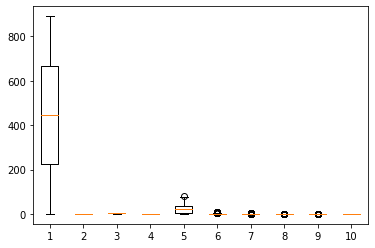

In [65]:
plt.boxplot(train_data_drop)

In [66]:
#Separating the traget variable and the independent variables

In [67]:
y = train_data_drop.Survived.copy()
X = train_data_drop.drop(['Survived'], axis=1)
X_Test = test_data_drop[["Pclass","Sex","Age","SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S","PassengerId"]]

In [68]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,631,1,0,80,0,0,0,0,1
1,852,3,0,74,0,0,0,0,1
2,97,1,0,71,0,0,1,0,0
3,494,1,0,71,0,0,1,0,0
4,117,3,0,70,0,0,0,1,0


In [69]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   Age          891 non-null    int32
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Embarked_C   891 non-null    uint8
 7   Embarked_Q   891 non-null    uint8
 8   Embarked_S   891 non-null    uint8
dtypes: int32(1), int64(5), uint8(3)
memory usage: 41.0 KB


### Train_test Split

In [71]:
from sklearn.model_selection import train_test_split
X_train,x_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2, random_state =7)

## Building the primary model

### Decision Tree Algorithm

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(x_valid)
    depth.append(accuracy_score(y_valid,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_valid,yhat))

For max depth =  1  :  0.8268156424581006
For max depth =  2  :  0.8268156424581006
For max depth =  3  :  0.8324022346368715
For max depth =  4  :  0.8324022346368715
For max depth =  5  :  0.8268156424581006
For max depth =  6  :  0.8379888268156425
For max depth =  7  :  0.8044692737430168


In decision tree, we need to find the right dept till which the decision tree should split the data, since the model could esaily get overfitted if the dept is not specified.

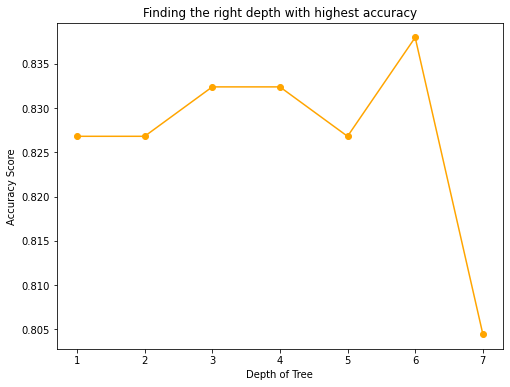

In [73]:
#plotting to see which depth provide us with most accurate prediciton
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="orange", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

We can observe that highest accuracy is obtained with depth=6, now we can train and predict with the help of depth. Wheres as the graph drops when depth=7

In [74]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 6)
clf_tr.fit(X,y)
pred_tree = clf_tr.predict(X_Test)
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test_data_drop["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


we got an accuracy score of 84%

### Cross Validation and Hyper-parameter Tuning

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_dict = {"criterion": ['gini','entropy'], "max_depth":range(1,10),"min_samples_split":range(1,10),"min_samples_leaf":range(1,5)}

In [76]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
grid = GridSearchCV(decision_tree, param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [78]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [79]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
grid.best_score_

0.8019953051643194

### Random Forest Algorithm

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(x_valid)
print("Accuracy for training data : ",accuracy_score(y_valid,yhat))

Accuracy for training data :  0.8268156424581006


In [82]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X,y)
y_forest = clf_for.predict(X_Test)
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test_data_drop["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


We got an accuracy score of 83%

### Cross-Validation anf Hyper-parameter Tuning

In [83]:
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score, cross_val_predict

In [84]:
# Stratified Cross Validation

In [85]:
# Cross Validation - Kfold Validation
skfold = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
scores_skfold = cross_val_score(clf_for, X, y, scoring='accuracy', cv=skfold, n_jobs=-1)
scores_skfold
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_skfold.mean(), scores_skfold.std()))

0.79 accuracy with a standard deviation of 0.02


Stratified cross validation is used for dealing with imbalanced dataset

In [86]:
# hyper parameter tuning

grid = { 
    'n_estimators': [200,300,400],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [87]:
rf_cv = GridSearchCV(clf_for, param_grid=grid, n_jobs=-1, cv= 2, error_score=0)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=0,
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400],
                         'random_state': [18]})

In [88]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 400,
 'random_state': 18}

## K-Nearest Neighbor

In [89]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [90]:
k_range = range(1, 26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    yhat = knn.predict(x_valid)
    scores.append(metrics.accuracy_score(y_valid,yhat))
print(scores)

[0.5307262569832403, 0.6480446927374302, 0.5307262569832403, 0.6089385474860335, 0.5418994413407822, 0.5754189944134078, 0.5698324022346368, 0.5865921787709497, 0.5642458100558659, 0.6033519553072626, 0.5698324022346368, 0.6201117318435754, 0.5977653631284916, 0.6033519553072626, 0.5977653631284916, 0.6424581005586593, 0.6145251396648045, 0.6256983240223464, 0.6033519553072626, 0.6368715083798883, 0.6312849162011173, 0.6256983240223464, 0.6424581005586593, 0.6256983240223464, 0.6368715083798883]


Text(0, 0.5, 'Testing Accuracy')

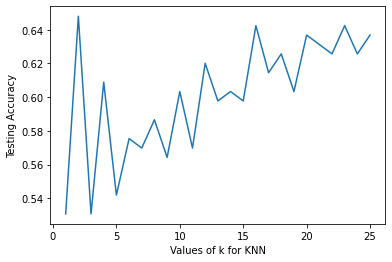

In [91]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Values of k for KNN')
plt.ylabel('Testing Accuracy')

The above graph represents the highest accuracy when k value is taken from 1 to 26. As a result we can see that K value equal 2 has the highest accuracy rate which is 65% so we can now keep k =2

In [92]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
Y_pred = knn.predict(X_Test)

df_knn = pd.DataFrame({
    "PassengerId": test_data_drop["PassengerId"],
    "Survived" : Y_pred
})

In [93]:
df_knn.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


## Cross-Validation and Hyper-parameter Tuning

#### GridSearch CV

In [94]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,60))
n_neighbors = list(range(1,26))
p=[1,2]

In [95]:
hyperparameter = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [96]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,hyperparameter,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25],
                         'p': [1, 2]})

In [97]:
knn_cv.best_score_

0.589906103286385

In [98]:
knn_cv.best_params_

{'leaf_size': 3, 'n_neighbors': 2, 'p': 1}

### Feature Selection 

In [99]:
# necessary imports:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(score_func=chi2, k=2)
fit = best_features.fit(X, y) # Run score function on (X, y) and get the appropriate features.
select_kbest = best_features.fit_transform(X, y)

In [100]:
select_kbest.dtype

dtype('int64')

In [101]:
# Storing features and there score value in dataframes:
dfscores = pd.DataFrame(fit.scores_)
dfcoloumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
features_scores = pd.concat([dfcoloumns, dfscores], axis = 1)
features_scores.columns = ["Features", "Scores"] # naming the dataframe Coloumns
# saving dataframe to csv
name = "feature_scores"
features_scores.to_csv(name)
features_scores

,Features,Scores
0,PassengerId,3.312934
1,Pclass,30.873699
2,Sex,170.348127
3,Age,1.279565
4,SibSp,2.581865
5,Parch,10.097499
6,Embarked_C,20.464401
7,Embarked_Q,0.010847
8,Embarked_S,5.984840


In [102]:
# Drop the unwanted features i.e. only keep top k features:
select_kbest = best_features.fit_transform(X, y)
index_kbest = best_features.get_support() # provides the index for kbest features
selected_features = X.loc[:,index_kbest].columns.tolist()
selected = X.drop(['PassengerId','Age','SibSp','Embarked_Q','Embarked_S','Embarked_C','Parch'],axis=1)

In [103]:
selected_features

['Pclass', 'Sex']

In [104]:
assert select_kbest.shape[0] == y.shape[0], "Number of data in feature must be equal with target"

In [105]:
X_train, x_valid, y_train, y_valid = train_test_split(selected, y, test_size=0.2, random_state=7)

In [106]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  891 non-null    int64
 1   Sex     891 non-null    int64
dtypes: int64(2)
memory usage: 14.0 KB


### Rebuilding Model for KNN

In [107]:
knn2nd = KNeighborsClassifier(n_neighbors=2)
knn2nd.fit(X_train,y_train)
y_pred = knn2nd.predict(x_valid)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
leaf_size = 3
n_neighbors = 2
p=1 

In [109]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,hyperparameter,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25],
                         'p': [1, 2]})

In [110]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid,y_pred))

[[105  14]
 [ 17  43]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       119
           1       0.75      0.72      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179



* After rebuilding the KNN Model we obtained the accuracy of 83%

True Positive = 105 , False Negative = 14, False Positive = 17, True Negative = 43

In [111]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
Y_pred = knn.predict(X_Test)

df_knn = pd.DataFrame({
    "PassengerId": test_data_drop["PassengerId"],
    "Survived" : Y_pred
})

In [112]:
df_knn.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### Rebuilding Model for random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(criterion= 'gini',
 max_depth= 7,
 max_features= 'sqrt',
 n_estimators= 400,
 random_state= 18)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=400,
                       random_state=18)

In [114]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf_forest.predict(x_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid,y_pred))

[[105  14]
 [ 17  43]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       119
           1       0.75      0.72      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179



True Positive = 105 , False Negative = 14, False Positive = 17, True Negative = 43

In [115]:
new_radom_forest_accuracy= accuracy_score(y_valid, y_pred)
print('Model accuracy score: {0:0.4f}'. format(new_radom_forest_accuracy))

Model accuracy score: 0.8268


In [116]:
clf_for = RandomForestClassifier(random_state=18)
clf_for.fit(X,y)
y_forest = clf_for.predict(X_Test)
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test_data_drop["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


* We got an accuracy of 83% after rebuiliding the random forest model

### Rebuilding Model for Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X,y)
pred_tree = clf_tr.predict(X_Test)
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test_data_drop["PassengerId"]
df_TREE["Survived"] = pred_tree
accuracy = accuracy_score(y_valid, y_pred)
print('Model accuracy score: {0:0.4f}'. format(accuracy))

Model accuracy score: 0.8268


In [118]:
df_TREE.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


* After rebuilding the decision tree model we obtained accuracy of 83% 

In [119]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[105  14]
 [ 17  43]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       119
           1       0.75      0.72      0.74        60

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179



* In the Decision Tree model, after hyperparameter tuning and performing feature selection technique, the model had no increase in the accuracy, rather the accuracy got decreased by 1 % i.e. at before it was 84%, and now it is 83%

* In the Random Forest model, after hyperparameter tuning and performing feature selection technique, the model neither increased nor decreased it remained the same which is with the accuracy of 83%

* In the KNN model, after hyperparameter tuning and performing feature selection technique, the model has increased its accuracy by 19% i.e. 83% before that, the model accuracy was just 65%

True Positive = 105 , False Negative = 14, False Positive = 17, True Negative = 43